## INTRODUCTION
In this analysis, I aim to determine the relationship between vehicles features (like engine size, fuel types, transmissions system and cylinders) and fuel effieciency. Examining how various vehicles characteristics influence fuel consumption and emmissions. By assesing the dataset, I should provide actionable insights based on data driven to guide the company's decision making that align with fuel effieciency and market trends.

## PROBLEM STATEMENT
My company has observed that leading automotive manufacturers are producing new, highly fuel-efficient vehicles, and they are interested in joining this competitive market. They plan to establish a vehicle manufacturing plant but lack in-depth knowledge about vehicle design and performance characteristics.I have been tasked with analyzing the current market trends to identify the types of vehicles that excel in fuel efficiency. Using the fuel consumption dataset, I will explore various vehicle features to determine which configurations achieve the best fuel consumption and emissions performance. These findings will provide actionable insights to guide the company's decision-making on which type of vehicle to manufacture, aligning with current fuel efficiency standards and market demand.

## OBJECTIVES
1. Perform EDA to explore the dataset to identify the relationship between vehicles features and fuel efficiency
2. Examine optimal vehicle features for fuel efficiency.
- Best fuel efficient
- Lowest emmisions

3. Conduct Statistical Hypothesis. Identify statistically significant relationnships between vehicles characteristics and fuel efficiency.
4. Build a predictive regression model . To analyze the effect of various vehicle attributes on fuel consumption and emmision using an OLS regression model.

## DATA LOADING AND DESCRIPTION

TRANSMISSION

A - Automatic

AM - Automated Manual

AS - Automatic with Select Shift

AV - Continously Variable

M - Manual 

Number (3-10) - Number of gears

FUEL TYPE 

X - Regular gasoline

Z - Premium gasoline

E - Ethanol

D - Diesel

N - Natural Gas


In [160]:
#Importing the necessary libraries
import pandas as pd #Pandas Library
import numpy as np #Numpy Library
import matplotlib.pyplot as plt #Matplotlib library
import seaborn as sns #Seaborn library
from scipy import stats #scipy library



In [161]:
df = pd.read_csv("../Data/Fuel_Consumption_2000_2022.csv")
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [162]:
#Copy the original Dataset
data = df.copy()

In [163]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [164]:
#Checking rows and columns
df.shape


(22556, 13)

our dataset has 22556 rows and 13 columns

In [165]:
#Statistical for numerical columns
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [166]:
#Checking our columns by name
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

### Data Cleaning and Exploratory Data Analysis (EDA)

In [167]:
#Data Understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [168]:
#Converting the YEAR from object to Datetime datatype
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y').dt.year

In [169]:
#Data Understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [170]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [171]:
#Checking Null values from our Dataset
df.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

There is no null value in our dataset

In [172]:
#Checking duplicates
df.duplicated().sum()

1

In [173]:
#Verifying the duplicate
df[df.duplicated(keep=False)]

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
377,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,17.7,12.7,15.4,18,354
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,17.7,12.7,15.4,18,354


In [174]:
df= df.drop_duplicates()

In [175]:
df.duplicated().sum()

0

In [176]:
#converting strings into title case
df = df.applymap(lambda x : x.title() if isinstance(x, str) else x)

In [177]:
#Converting columns names to title case
df.columns = df.columns.str.title()

In [178]:
df.head(10)

,Year,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2000,Acura,1.6El,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,Acura,1.6El,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,Acura,3.2Tl,Mid-Size,3.2,6,As5,Z,12.2,7.4,10.0,28,230
3,2000,Acura,3.5Rl,Mid-Size,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,Acura,Integra,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198
5,2000,Acura,Integra,Subcompact,1.8,4,M5,X,9.3,6.8,8.2,34,189
6,2000,Acura,Integra Gsr/Type R,Subcompact,1.8,4,M5,Z,9.4,7.0,8.3,34,191
7,2000,Acura,Nsx,Subcompact,3.0,6,As4,Z,13.6,9.2,11.6,24,267
8,2000,Acura,Nsx,Subcompact,3.2,6,M6,Z,13.8,9.1,11.7,24,269
9,2000,Audi,A4,Compact,1.8,4,A5,Z,11.4,7.2,9.5,30,218


In [179]:
 df['Vehicle Class'].value_counts()

Compact                     3127
Mid-Size                    2960
Suv                         2639
Subcompact                  2010
Pickup Truck - Standard     1689
Full-Size                   1503
Two-Seater                  1312
Minicompact                  994
Suv: Small                   929
Suv - Small                  827
Station Wagon - Small        737
Suv: Standard                608
Pickup Truck: Standard       515
Suv - Standard               514
Minivan                      408
Pickup Truck - Small         403
Station Wagon - Mid-Size     343
Van - Cargo                  332
Van - Passenger              287
Station Wagon: Small         140
Special Purpose Vehicle      114
Pickup Truck: Small          108
Station Wagon: Mid-Size       44
Van: Passenger                12
Name: Vehicle Class, dtype: int64

In [180]:
#Replacing (:) to (-)  in Vehicle Class column for uniformity 
df['Vehicle Class'] = df['Vehicle Class'].str.replace(r':', '-' , regex=True)

In [181]:
#Replacing (Line_Space) to (non)  in Vehicle Class column for uniformity 
df['Vehicle Class'] = df['Vehicle Class'].str.replace(r' ', '' , regex=True)

In [182]:
df["Vehicle Class"].value_counts()

Compact                  3127
Mid-Size                 2960
Suv                      2639
PickupTruck-Standard     2204
Subcompact               2010
Suv-Small                1756
Full-Size                1503
Two-Seater               1312
Suv-Standard             1122
Minicompact               994
StationWagon-Small        877
PickupTruck-Small         511
Minivan                   408
StationWagon-Mid-Size     387
Van-Cargo                 332
Van-Passenger             299
SpecialPurposeVehicle     114
Name: Vehicle Class, dtype: int64

In [183]:
df['Model'].value_counts()

Mustang            110
Jetta               97
Silverado           77
Sierra              77
Sierra 4Wd          70
                  ... 
Freelander 4X4       1
Focus Sfe            1
Gle 350 4Matic       1
E 500 4-Matic #      1
Kjr #                1
Name: Model, Length: 3730, dtype: int64

In [184]:
# dropping columns that are NOT necesssary in our analysis
df = df.drop(columns= ['Model'])

In [185]:
df

,Year,Make,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
0,2000,Acura,Compact,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,Acura,Compact,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,Acura,Mid-Size,3.2,6,As5,Z,12.2,7.4,10.0,28,230
3,2000,Acura,Mid-Size,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,Acura,Subcompact,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,Suv-Small,2.0,4,As8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,Suv-Small,2.0,4,As8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,Suv-Small,2.0,4,As8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,Suv-Standard,2.0,4,As8,Z,11.5,8.4,10.1,28,236


In [186]:
#Cheking outliers and removing them using IQR method
#Numerical columns only
numerical_columns = df.select_dtypes(include=[np.number]).columns

#Function to detect and remove outlier in our dataset
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Remain with rows within the bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df
#Removing outliers
df = remove_outliers(df , numerical_columns)


##### DESCRIPTION ANALYSIS FOR NUMERICAL COLUMNS

In [187]:
df.describe()

,Year,Engine Size,Cylinders,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
count,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000
mean,2011.554955,3.356617,5.854046,12.763294,8.918958,11.034148,27.374950,250.063844
std,6.297939,1.335448,1.819582,3.500922,2.274675,2.910839,7.376881,59.352558
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.700000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [188]:
df.shape

(22555, 12)

### DATA VISUALIZATION

Trends of fuel efficiency over the last years

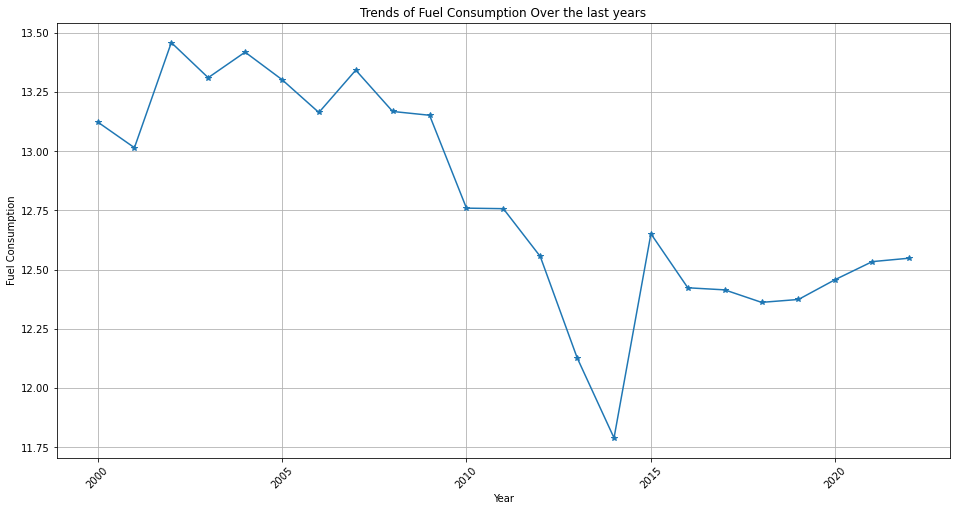

In [189]:
Trend = df.groupby('Year')['Fuel Consumption'].mean()
plt.figure(figsize=(16, 8))
plt.plot(Trend.index , Trend.values , marker = '*' )
plt.title('Trends of Fuel Consumption Over the last years')
plt.xlabel('Year')
plt.ylabel('Fuel Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

There is more fuel efficient as there were technological advancement. This shows a tremendous improvement

Correlation among vehcile features

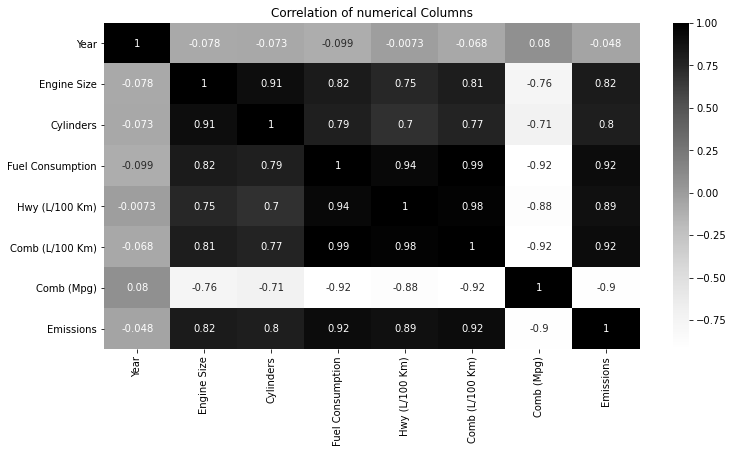

In [190]:

numerical_columns = df.select_dtypes(include=[np.number])
correlation = numerical_columns.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation , cmap = 'Greys', annot=True)
plt.title("Correlation of numerical Columns")
plt.show()

Generally there is strong positive correlation among the features except comb(mpg) which has strong negative correlation

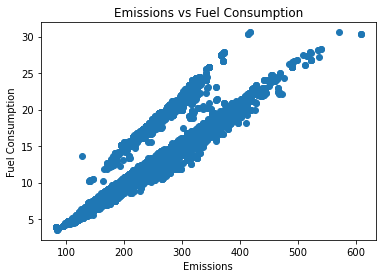

In [191]:
plt.scatter(df['Emissions'], df['Fuel Consumption'])
plt.title("Emissions vs Fuel Consumption")
plt.xlabel("Emissions")
plt.ylabel("Fuel Consumption")
plt.show()

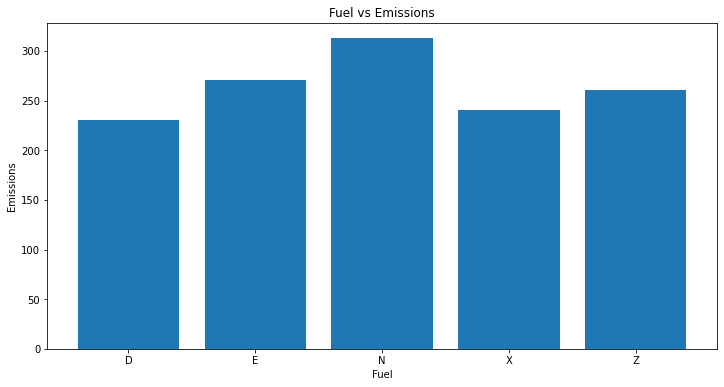

In [192]:
fuel_emissions = df.groupby('Fuel')['Emissions'].mean()
plt.figure(figsize=(12 , 6))
plt.bar(fuel_emissions.index , fuel_emissions.values)
plt.title('Fuel vs Emissions')
plt.xlabel('Fuel')
plt.ylabel('Emissions')
plt.show()